In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\labs\TSA\Patient_Satisfaction_Survey_Data.csv")
df.head()

,Observation,x1,x2,y
0,1,55,50,68
1,2,46,24,77
2,3,30,46,96
3,4,35,48,80
4,5,59,58,43


In [3]:
X = df[['x1', 'x2']].values
y = df['y'].values
X

array([[55, 50],
       [46, 24],
       [30, 46],
       [35, 48],
       [59, 58],
       [61, 60],
       [74, 65],
       [38, 42],
       [27, 42],
       [51, 50],
       [53, 38],
       [41, 30],
       [37, 31],
       [24, 34],
       [42, 30],
       [50, 48],
       [58, 61],
       [60, 71],
       [62, 62],
       [68, 38],
       [70, 41],
       [79, 66],
       [63, 31],
       [39, 42],
       [49, 40]], dtype=int64)

In [4]:
y

array([ 68,  77,  96,  80,  43,  44,  26,  88,  75,  57,  56,  88,  88,
       102,  88,  70,  52,  43,  46,  56,  59,  26,  52,  83,  75],
      dtype=int64)

In [5]:
# np.ones Return a new array of given shape and type, filled with ones.
# np.column_stack Stack 1-D arrays as columns into a 2-D array.

X = np.column_stack((np.ones(len(X)), X))
X

array([[ 1., 55., 50.],
       [ 1., 46., 24.],
       [ 1., 30., 46.],
       [ 1., 35., 48.],
       [ 1., 59., 58.],
       [ 1., 61., 60.],
       [ 1., 74., 65.],
       [ 1., 38., 42.],
       [ 1., 27., 42.],
       [ 1., 51., 50.],
       [ 1., 53., 38.],
       [ 1., 41., 30.],
       [ 1., 37., 31.],
       [ 1., 24., 34.],
       [ 1., 42., 30.],
       [ 1., 50., 48.],
       [ 1., 58., 61.],
       [ 1., 60., 71.],
       [ 1., 62., 62.],
       [ 1., 68., 38.],
       [ 1., 70., 41.],
       [ 1., 79., 66.],
       [ 1., 63., 31.],
       [ 1., 39., 42.],
       [ 1., 49., 40.]])

In [6]:
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)

In [7]:
X_transpose_X

array([[2.5000e+01, 1.2710e+03, 1.1480e+03],
       [1.2710e+03, 6.9881e+04, 6.0814e+04],
       [1.1480e+03, 6.0814e+04, 5.6790e+04]])

In [8]:
X_transpose_y

array([ 1638., 76487., 70426.])

In [9]:
coefficients = np.linalg.inv(X_transpose_X).dot(X_transpose_y)
coefficients

array([143.47201181,  -1.03105341,  -0.55603781])

In [10]:
print('Regression Equation:', f"y' = {coefficients[0]:.3f} + {coefficients[1]:.3f} x1 + {coefficients[2]:.3f} x2")

Regression Equation: y' = 143.472 + -1.031 x1 + -0.556 x2


In [11]:
y_pred = coefficients[0] + coefficients[1] * df['x1'] + coefficients[2] * df['x2']
y_pred

0     58.962184
1     82.698647
2     86.962670
3     80.695327
4     50.389667
5     47.215485
6     31.031602
7     80.938394
8     92.279982
9     63.086397
10    67.696744
11    84.517688
12    88.085863
13    99.821444
14    83.486634
15    65.229526
16    49.752607
17    42.130122
18    45.072356
19    52.230943
20    48.500723
21    25.320297
22    61.278475
23    79.907341
24    70.708882
dtype: float64

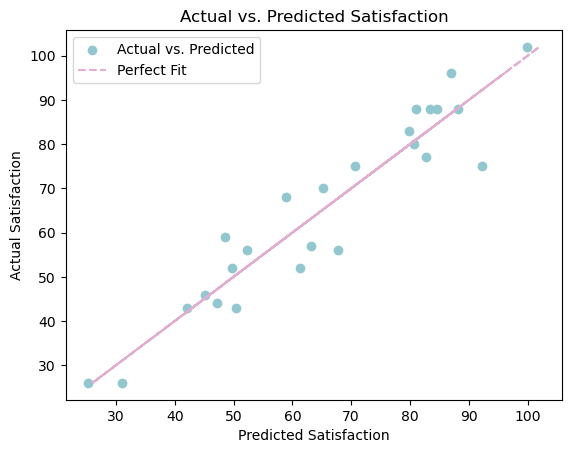

In [18]:
plt.scatter(y_pred, df['y'],  label='Actual vs. Predicted', color='#92C7CF')
plt.plot(df['y'], df['y'], label='Perfect Fit', color='#E0AED0', linestyle='--')

plt.xlabel('Predicted Satisfaction')
plt.ylabel('Actual Satisfaction')
plt.title('Actual vs. Predicted Satisfaction')
plt.legend()

plt.show()

In [19]:
Residual = y - y_pred
Residual

0      9.037816
1     -5.698647
2      9.037330
3     -0.695327
4     -7.389667
5     -3.215485
6     -5.031602
7      7.061606
8    -17.279982
9     -6.086397
10   -11.696744
11     3.482312
12    -0.085863
13     2.178556
14     4.513366
15     4.770474
16     2.247393
17     0.869878
18     0.927644
19     3.769057
20    10.499277
21     0.679703
22    -9.278475
23     3.092659
24     4.291118
dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error

In [27]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

6.676963230165672